# Theme of this notebook - how to build and evaluate multivariate regression models
* This notebook covers how to use seaborn, statsmodel, scipy, etc. to build multivariate regression models
* Let's practice throughout solving sample questions

# Note1: How to evaluate regression models
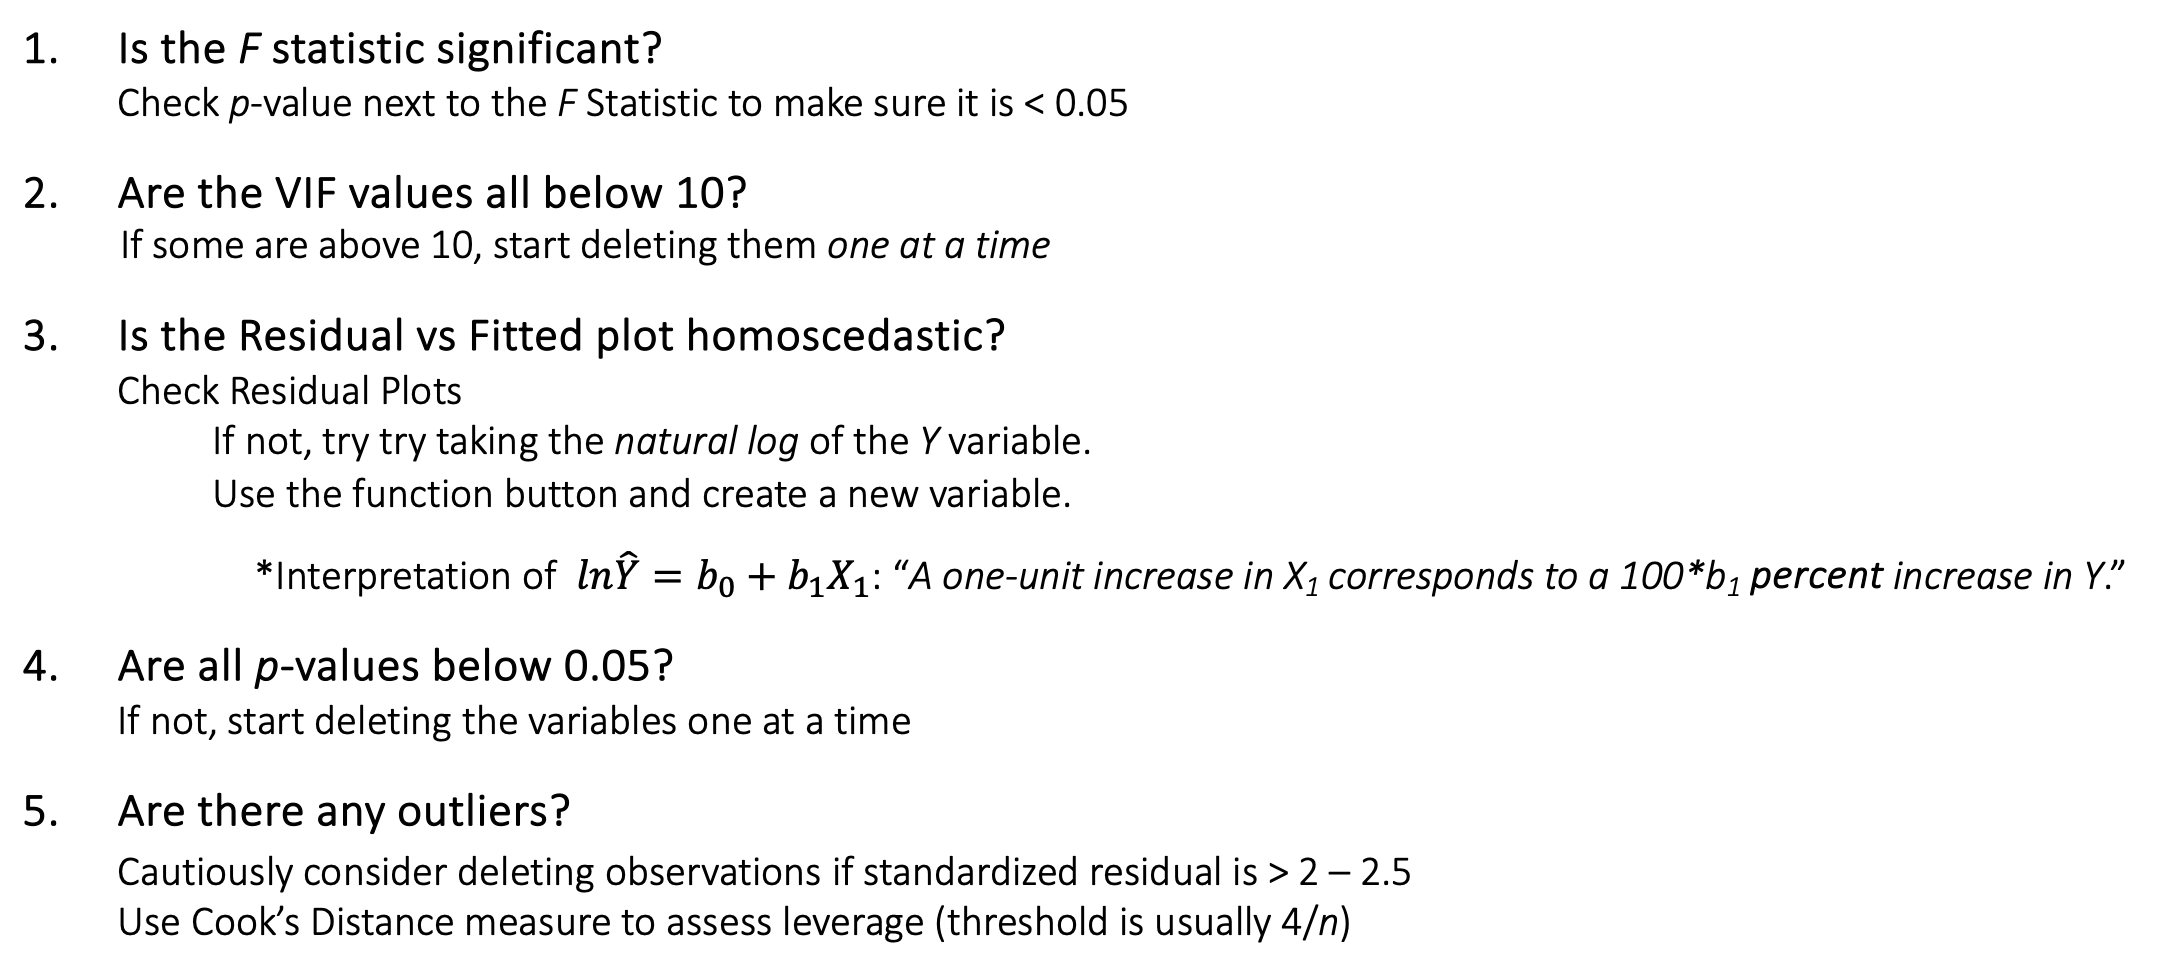

# Note2: The difference between $R^2$ VS $Adj. R^2$
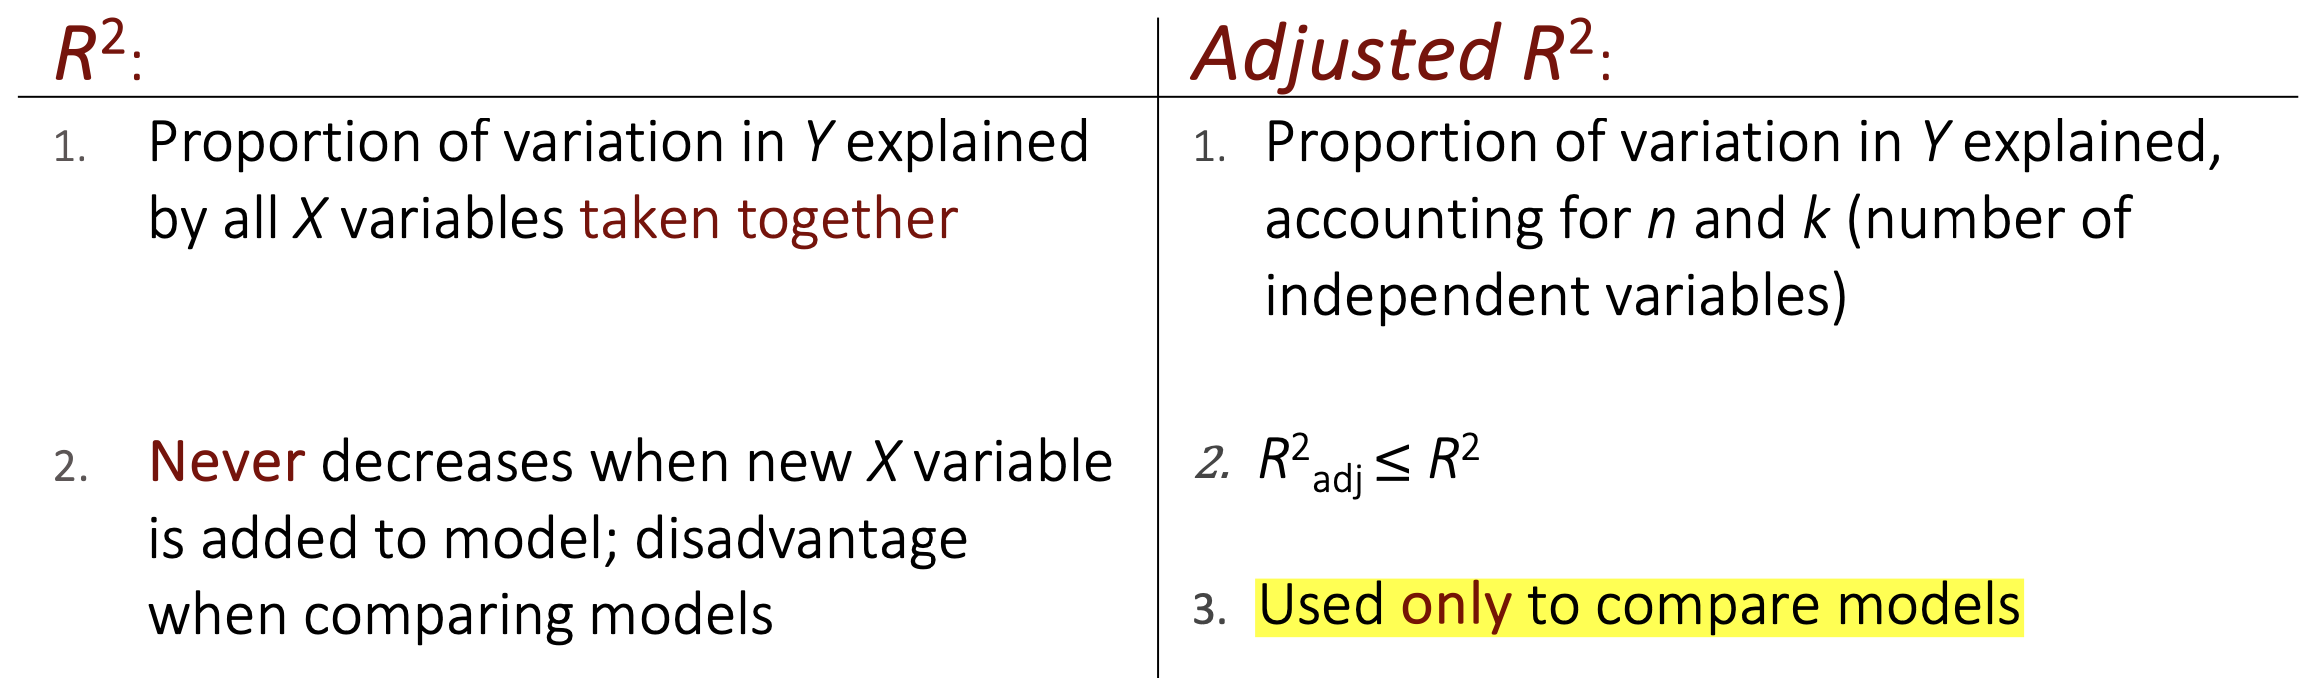

# Probrem #1

<Axes: >

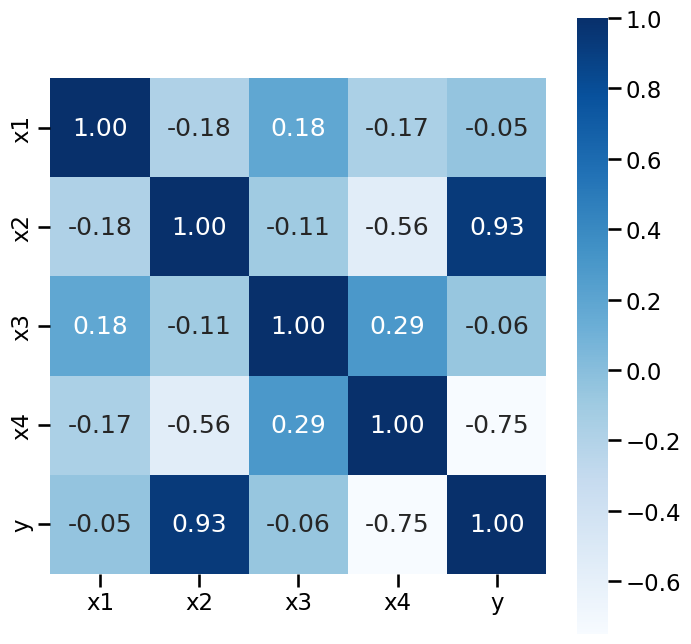

In [24]:
# Problem (a)
# Construct a correlation matrix between x1, x2, x3, x4, and y.
# Is there any avidence that multicollinearity may be a problem?

# Load data
import pandas as pd
data1 = pd.read_csv('stat-005-1_x1x2x3x4y.csv')
variables = data1.iloc[:,1:]

# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Construct a correlation matrix
sns.set_context("talk")
fig = plt.subplots(figsize=(8,8))

sns.heatmap(variables.corr(),annot=True,fmt='.2f',cmap='Blues',square=True)

# Question(a):
Is there any avidence that multicollinearity may be a problem?

# My Answer:
No, there is no evidence that multicollinearity may be a problem.<br>
This is because each absolute value of correlation coefficients among independent variables is under 0.7.


In [25]:
# Problem (b)-1
# Determine the multiple regression line using all the explanatory variables listed.

# Using statsmodels library
import statsmodels.api as smf
x = variables[['x1','x2','x3','x4']]
y = variables['y']
x = smf.add_constant(x)

model1  = smf.OLS(y,x).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     40.90
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           6.10e-05
Time:                        03:08:14   Log-Likelihood:                -44.681
No. Observations:                  12   AIC:                             99.36
Df Residuals:                       7   BIC:                             101.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.0235     61.340      4.549      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# The multiple regression line is:
# Y = 279.0235 + 0.0681X1 + 1.1460X2 + 0.3897X3 - 2.9378X4

In [26]:
# Problem (b)-2
# Does the F-test indicate that we should reject H0:β1=β2=β3=β4=0?
# Which explanatory variables have slope coeficients that are not significantly different from zero?

According to the summary of the model, the probability of F-statistic score is 6.10e-05.<br>

Therefore, if we set a level of statistical significance as α = 0.05, it is clear that the probability of F-statistic score: 6.10e-05 < α = 0.05.<br>
Thus, we should reject H0:β1=β2=β3=β4=0.

# Question(b):
Which explanatory variables have slope coeficients that are not significantly different from zero?

# My Answer:
x1 and x3.
<br>
[Reason]<br>
Each P-value of the slope coeficients of x1 and x3 are 0.955 and 0.183, respectively.<br>
It is clear that each P-Value is larger than α = 0.05.<br>
Therefore, we fail to reject β1=0 and β3=0.

In conclusion, x1 and x3 have slope coeficients that are not significantly different from zero.

In [27]:
# Problem (c) - 1
# Remove the explanatory variable with the highest P-value from the model and recompute the regression model.
# Does the F-test still indicate that the model is signiificant?

According to the statsmodel, the explanatory variable with the highest P-value is x1 whose P-value is 0.955
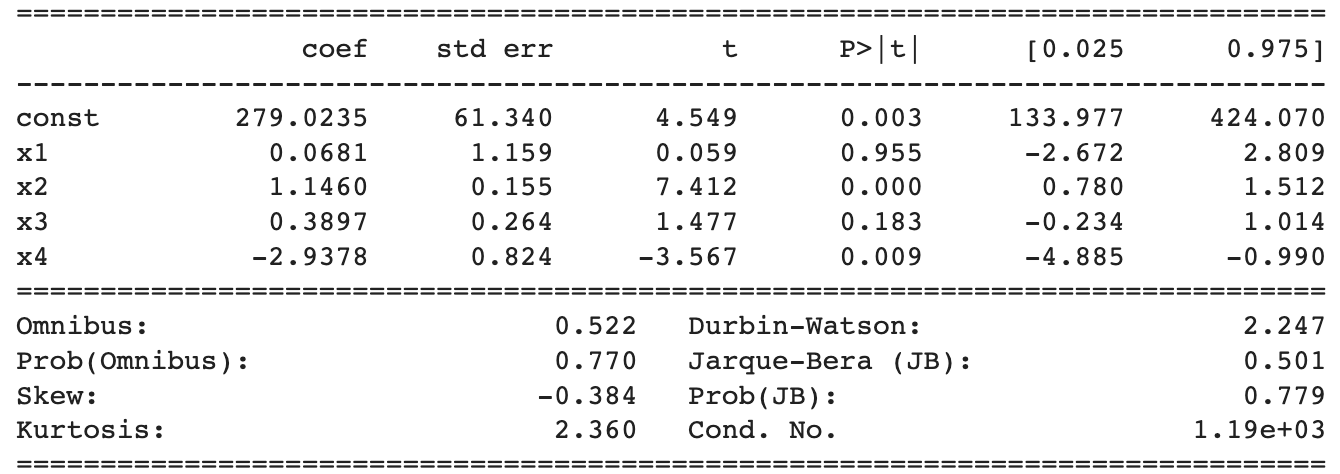

In [28]:
# Recompute the model
x_mod1 = variables[['x2','x3','x4']]
y_mod1 = variables['y']
x_mod1 = smf.add_constant(x_mod1)

model2 = smf.OLS(y_mod1,x_mod1).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     62.29
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           6.87e-06
Time:                        03:08:15   Log-Likelihood:                -44.684
No. Observations:                  12   AIC:                             97.37
Df Residuals:                       8   BIC:                             99.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        282.3256     22.952     12.301      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Question (c)-1:
Does the F-test still indicate that the model is signiificant?
# My answer:
According to the result, the probability of F-statistic score is 6.87e-06.<br>
Therefore, if we set a level of statistical significance as α = 0.05, it is clear that the probability of F-statistic score: 6.87e-06 < α = 0.05.<br>
Thus, we conclude that the model is still significant.


In [29]:
# Problem (c)-2
# Remove any additonal explanatory variables on the vasis of the P-value of the slope coefficent.
# Then compute the model with the variable removed.

According to the modified statsmodel, the explanatory variable with the highest P-value is x3 whose P-value is 0.134
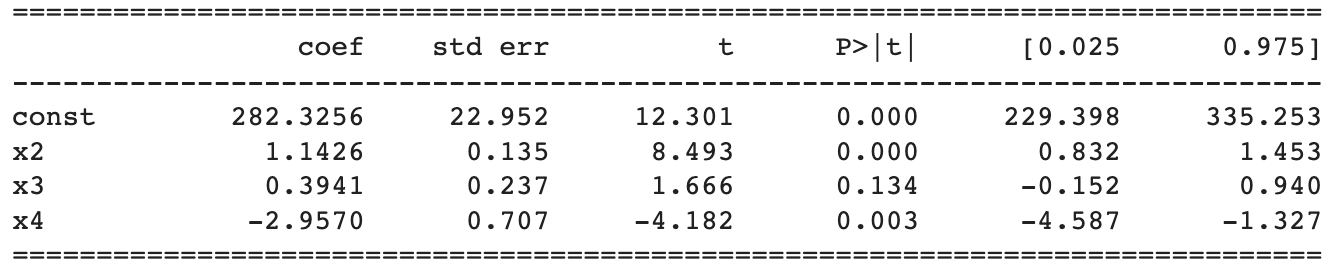

In [30]:
# Modified the model
x_mod2 = variables[['x2','x4']]
y_mod2 = variables['y']
x_mod2 = smf.add_constant(x_mod2)

model3 = smf.OLS(y_mod2,x_mod2).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     76.89
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.20e-06
Time:                        03:08:16   Log-Likelihood:                -46.470
No. Observations:                  12   AIC:                             98.94
Df Residuals:                       9   BIC:                             100.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.6166     25.108     11.216      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


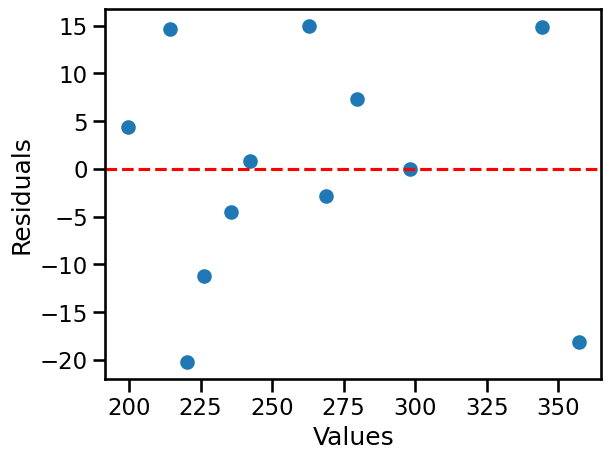

In [31]:
# Problem(d)
# Draw residual plots and a box plot of the residuals to assess the adequancy of the model.

# First, create residual plot
residuals = model3.resid
plt.scatter(x = model3.fittedvalues, y = residuals)
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

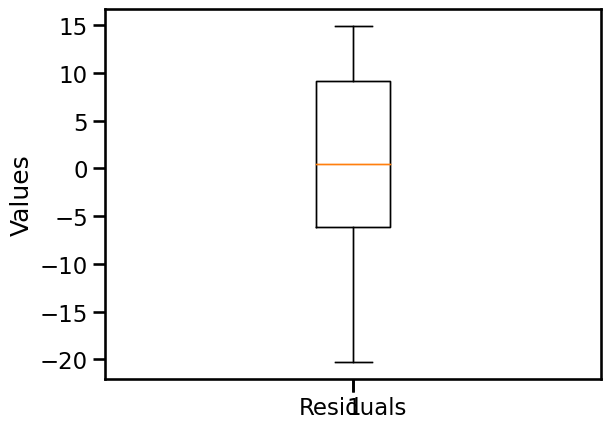

In [32]:
# Second, create a boxplot of the residuals
plt.boxplot(residuals)
ax = plt.subplot()
ax.boxplot(residuals,labels=['Residuals'])
ax.set_ylabel('Values')
plt.show()

# Question (d):
Assess the adequancy of the model
# My answer:
The residual plot shows residuals are randomly distributed.<br>
However, the boxplot indicates the distribution is left-skewed.

In [33]:
# Question (e)
# Use the model constructed in part (c) to predict the value of y
# if x1 = 34, x2 = 35.6, x3 = 12.4, and x4 = 29

# Let's use model3
# Recap the model3
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     76.89
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           2.20e-06
Time:                        03:08:16   Log-Likelihood:                -46.470
No. Observations:                  12   AIC:                             98.94
Df Residuals:                       9   BIC:                             100.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.6166     25.108     11.216      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [34]:
#Define each variable
const = 281.6166
x2 = 35.6
x4 = 29
x2_coef = 1.1584
x4_coef = -2.6267

# Predict y
y_predict = const + x2_coef*x2 + x4_coef*x4
print(y_predict)

246.68133999999998


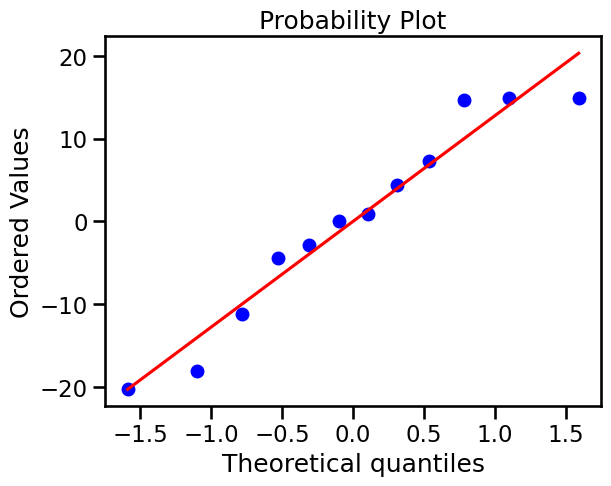

In [35]:
# Question (f)
# Draw a normal probability plot of the residuals.

import pylab
import scipy.stats as stats

residuals = model3.resid
residuals = residuals.sort_values(ascending = True)

# Create the normal probability plot
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

# Question (f):
Is it reasonable to construct confidense and prediction intervals?
# My answer:
No.<br>
Based on a normal probability plot, the points are not perfectly aligning with the line.<br>
Probably, we need more samples in order to to construct confidense and prediction intervals.<br>

# Problem #2 : Housing Prices
A realtor wanted to find a model that relates the asking price of a house to the square footage, number of bedrooms, and number of baths.<br>
The following data are from houses in Greenville, South Carolina.

<Axes: >

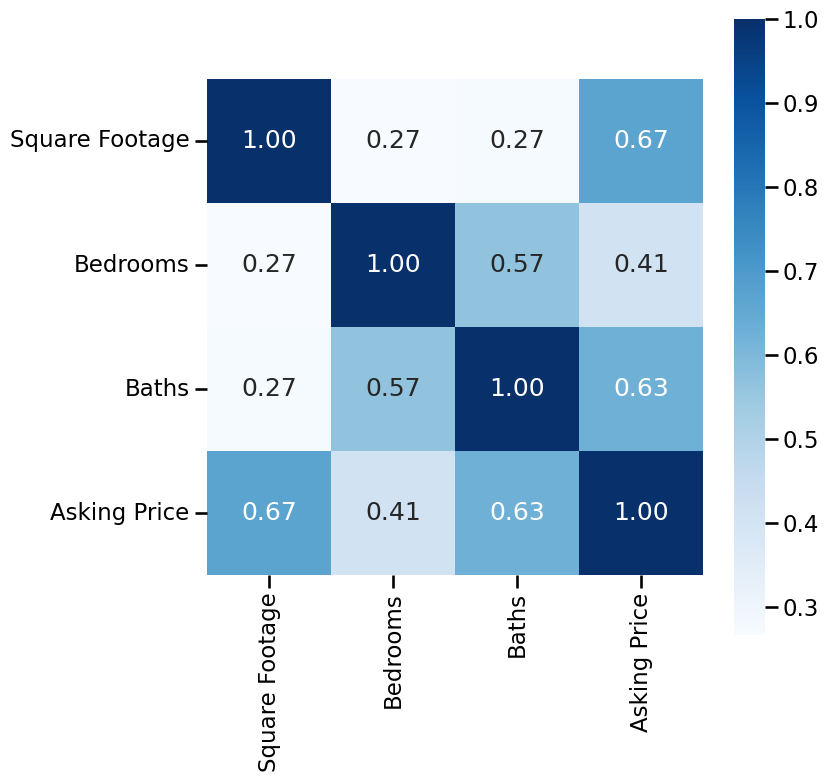

In [36]:
# Question (a)
# Construct the correlation matrix. Is there any reason to be concerned with multicolinearity?

# Load data
data2 = pd.read_csv('stat-005-2_Housing.csv')

# import libraries
# Construct a correlation matrix
sns.set_context("talk")
fig = plt.subplots(figsize=(8,8))

sns.heatmap(data2.corr(),annot=True,fmt='.2f',cmap='Blues',square=True)

# Question(a):
Is there any avidence that multicollinearity may be a problem?

# My Answer:
No, there is no evidence that multicollinearity may be a problem.<br>
This is because each absolute value of correlation coefficients among Square Footage, Bedrooms, and Baths is under 0.7.


In [37]:
# Question (b)
# Find the lease-squares regression equation y^ = b0 + b1x1 + b2x2 + b3x3,
# where x1 is square footage, x2 is number of bedrooms, x3 is number of baths,
# and y is the response variable "asking price"

# Use statsmodel
x_q2 = data2[['Square Footage','Bedrooms','Baths']]
y_q2 = data2['Asking Price']
x_q2 = smf.add_constant(x_q2)

model_q2  = smf.OLS(y_q2,x_q2).fit()
print(model_q2.summary())

                            OLS Regression Results                            
Dep. Variable:           Asking Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5.717
Date:                Mon, 22 Jan 2024   Prob (F-statistic):             0.0180
Time:                        03:08:22   Log-Likelihood:                -65.897
No. Observations:                  13   AIC:                             139.8
Df Residuals:                       9   BIC:                             142.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             25.6281     98.192      0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# The lease-squares regression equation y^ = b0 + b1x1 + b2x2 + b3x3 is:
# y^ = 25.6281 + 0.0719x1 - 0.8099x2 + 55.3491x3

In [38]:
# Question (c)
# Test H0: β1 = β2 = β3 = 0 versus H1: at least one of the βi = 0
# at the α = 0.05 level of significance.

params_q2_1 = np.identity(len(model_q2.params))
params_q2_1 = params_q2_1[1:,:]
print(model_q2.f_test(params_q2_1))

<F test: F=5.716503809337012, p=0.018038206110722942, df_denom=9, df_num=3>


According to the summary of the model, the probability of F-statistic score is 0.0180.<br>

It is clear that the probability of F-statistic score: 0.0180 < α = 0.05.<br>
Thus, we conclude we should reject H0: β1 = β2 = β3 = 0 and accept H1: at least one of the βi = 0.

In [39]:
# Question (d)
# Test the hypotheses at the α = 0.05 level of significance.
# H0: β1 = 0 versus H1: β1 ≠ 0
# H0: β2 = 0 versus H1: β2 ≠ 0
# H0: β3 = 0 versus H1: β3 ≠ 0

According to the summary of the statsmodel, each P-value is as follows.
<br>
* P-value of β1 (Square Footage): 0.028 < α = 0.05
* P-value of β2 (Bedrooms): 0.977 > α = 0.05
* P-value of β3 (Baths): 0.075 > α = 0.05

Therefore, we can conclude:
* H0: β1 = 0 should be rejected and H1: β1 ≠ 0 should be accepted.
* H0: β2 = 0 should be not rejected because its P-value is not statistically signicicant.
* H0: β3 = 0 should be not rejected because its P-value is not statistically signicicant.

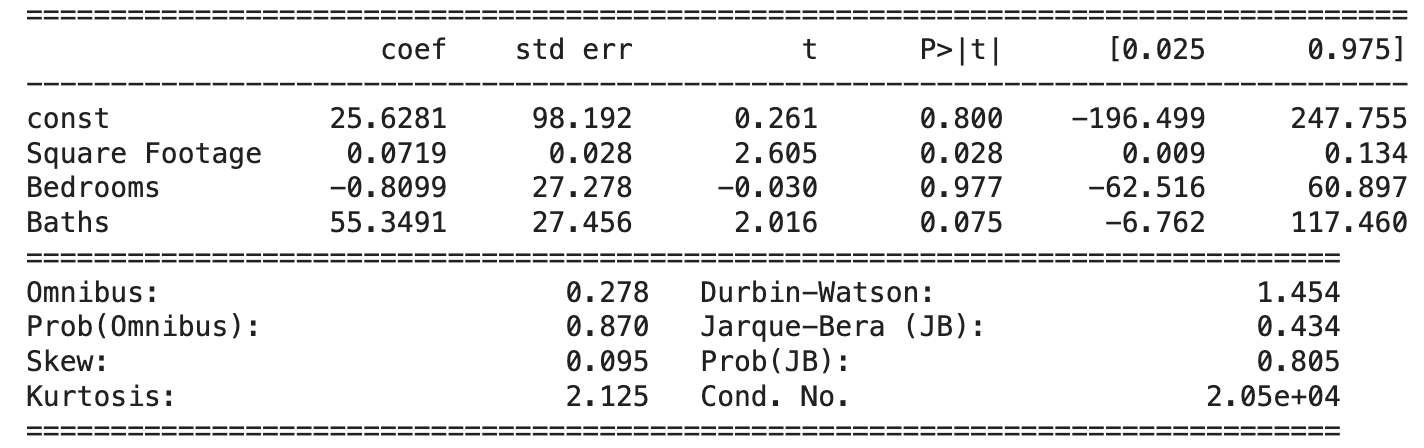

In [40]:
# Question (e)
# Remove the explanatory variable with the highest P-Value and
# compute the least-squares regression equation.
# Are all the slope coefficients significantly different from zero?


# The highest P-value is 0.977 of β2. Thus, eleminate Bedrooms
x_q2_mod = data2[['Square Footage','Baths']]
y_q2_mod = data2['Asking Price']
x_q2_mod = smf.add_constant(x_q2_mod)

model_q2_mod  = smf.OLS(y_q2_mod,x_q2_mod).fit()
print(model_q2_mod.summary())

                            OLS Regression Results                            
Dep. Variable:           Asking Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9.526
Date:                Mon, 22 Jan 2024   Prob (F-statistic):            0.00483
Time:                        03:08:24   Log-Likelihood:                -65.898
No. Observations:                  13   AIC:                             137.8
Df Residuals:                      10   BIC:                             139.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0920     79.178      0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# The least-squares regression equation of the modified statsmodel is:
# y^ = 24.0920 + 0.0718x1 + 54.9163x3

# Question(e):
Are all the slope coefficients significantly different from zero?<br>
(If not, remove the explanatory variable with the higher P-value and compute the least-squares regression equation.)

# My Answer:
Yes.<br>
According to the summary of the statsmodel, each P-value is as follows.
<br>
* P-value of β1 (Square Footage): 0.020 < α = 0.05
* P-value of β3 (Beths): 0.032 < α = 0.05

Therefore, we can conclude that all the slope coefficients statistically significantly different from zero.

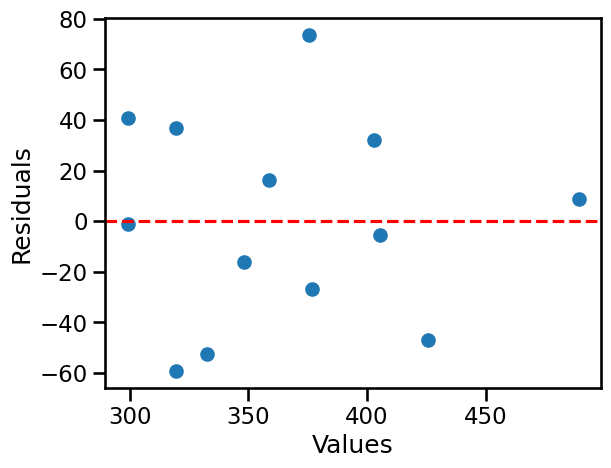

In [41]:
# Question (f)
# Draw residual plots, a boxplot of the residuals, and a normal probability plot
# of the residuals to assess the adequacy of the model found in part (e).

# First, create residual plots.
residuals_q2 = model_q2_mod.resid
plt.scatter(x = model_q2_mod.fittedvalues, y = residuals_q2)
plt.xlabel("Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

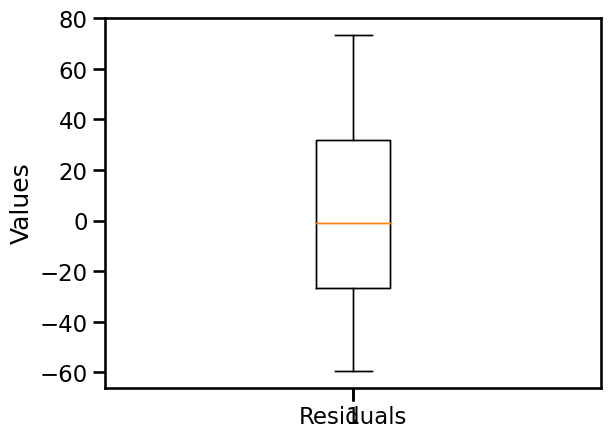

In [42]:
# Second, create a boxplot of the residuals
residuals_q2 = model_q2_mod.resid
plt.boxplot(residuals_q2)
ax = plt.subplot()
ax.boxplot(residuals_q2,labels=['Residuals'])
ax.set_ylabel('Values')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

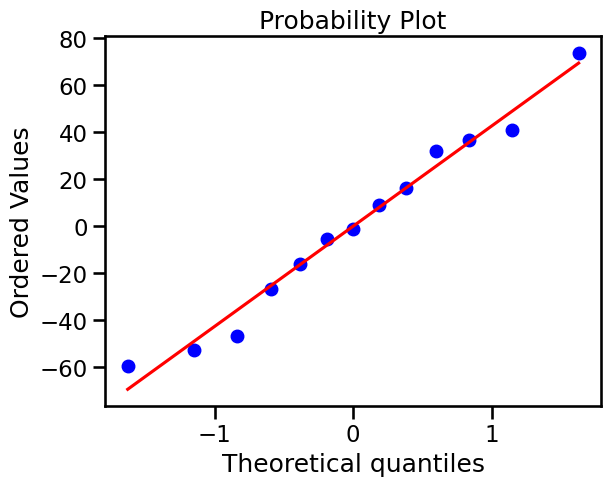

In [43]:
# Finally. create a normal probability plot
residuals_q2 = model_q2_mod.resid
residuals_q2 = residuals_q2.sort_values(ascending = True)

stats.probplot(residuals_q2, dist="norm", plot=pylab)
pylab.show

Based on the analysis, the residuals are approximately normally distributed.<br>
Multiple regression assumes that the residuals are normally distributed, and this result coincides the assumption.<br>
Therefore, we conclude that the model is adequate.

In [44]:
# Question (g)
# Interpret the regression coefficients for the least-squares regression equation found in part (e)
print(model_q2_mod.summary())

                            OLS Regression Results                            
Dep. Variable:           Asking Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9.526
Date:                Mon, 22 Jan 2024   Prob (F-statistic):            0.00483
Time:                        03:08:26   Log-Likelihood:                -65.898
No. Observations:                  13   AIC:                             137.8
Df Residuals:                      10   BIC:                             139.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0920     79.178      0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the model summary, we can indicate the following three facts:
* The R-squared value is 0.656.<br>
Therefore, 65.6% of asking price variations can be explained by the area of square footage and the number of baths.<br>
(In other words, 34.4% of asking price variations cannot be grasped by this model.)
* If the area of Square Footage is increased by one unit, the asking price will increase by 0.0718 as long as other variables are not changed.
* If the number of Baths is increased by one unit, the asking price will increase by 54.9163 as long as other variables are not changed.

In [45]:
# Question (h)
# Predict the asking price for a 2,900 square-foot house with 4 bedrooms and 3 baths.

# Let's use model_q2_mod
print(model_q2_mod.summary())

                            OLS Regression Results                            
Dep. Variable:           Asking Price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9.526
Date:                Mon, 22 Jan 2024   Prob (F-statistic):            0.00483
Time:                        03:08:26   Log-Likelihood:                -65.898
No. Observations:                  13   AIC:                             137.8
Df Residuals:                      10   BIC:                             139.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             24.0920     79.178      0.

In [46]:
# Define each variable
b0 = 24.0920
b1 = 0.0718
x1 = 2900.0
b3 = 54.9163
x3 = 3.0

# Predict asling price
y_asking_price = b0 + b1*x1 + b3*x3
print(y_asking_price)

397.0609


In [47]:
#---End---